In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Import the data into python lists

train_raw=[]
for line in open('/content/drive/My Drive/movie_data/full_train.txt','r'):
  train_raw.append(line.strip())
  
test_raw=[]
for line in open('/content/drive/My Drive/movie_data/full_test.txt','r'):
  test_raw.append(line.strip())
  
    
    
    
print(len(train_raw))
print(len(test_raw))

25000
25000


In [5]:
train_raw[900]    
     

'Very nicely done movie. It does stay in your memory. Better billed as a romance than flying or war, altho the flying parts are realistic and almost error free. Flying buffs like myself will enjoy this movie even if attracted by the airplanes, unless they have no sensitivity or have never been in love.<br /><br />Fun watching early Crowe. He is good and exudes charm. His reading of "High Flight" is superb.<br /><br />cheers, Boom'

In [6]:
# Find Statistics about the dataset

import numpy as np
mylen = np.vectorize(len)

alwords=[]

for rev in train_raw:
    for word in rev.split():
        alwords.append(word.lower())


print ('The stats of the train dataset')
print('Mean: %f' %mylen(train_raw).mean())
print('Median: %f' %np.median(mylen(train_raw)))
print('Mininum: %f'%mylen(train_raw).min())
print('Maxaimum: %f '%mylen(train_raw).max())
print('Std: %f '%mylen(train_raw).std())
print('Total # of words: %d' %len(alwords))
print('Total # of vocabulary: %d\n\n' %len(set(alwords)))


print ('The stats of the positive reviews')
print('Mean: %f' %mylen(train_raw[:12500]).mean())
print('Median: %f' %np.median(mylen(train_raw[:12500])))
print('Mininum: %f'%mylen(train_raw[:12500]).min())
print('Maxaimum: %f \n\n'%mylen(train_raw[:12500]).max())


print ('The stats of the negative reviews')
print('Mean: %f' %mylen(train_raw[12500:]).mean())
print('Median: %f' %np.median(mylen(train_raw[12500:])))
print('Mininum: %f'%mylen(train_raw[12500:]).min())
print('Maxaimum: %f \n\n'%mylen(train_raw[12500:]).max())


The stats of the train dataset
Mean: 1325.068600
Median: 979.000000
Mininum: 52.000000
Maxaimum: 13704.000000 
Std: 1003.112772 
Total # of words: 5844680
Total # of vocabulary: 251637


The stats of the positive reviews
Mean: 1347.159040
Median: 982.000000
Mininum: 70.000000
Maxaimum: 13704.000000 


The stats of the negative reviews
Mean: 1302.978160
Median: 976.500000
Mininum: 52.000000
Maxaimum: 8969.000000 




In [7]:
# Cleaning the datasets

import re
def get_clean(data):
    
    data=[re.sub('<.*?>',' ',doc) for doc in data]
    return data
        
cleantrain=get_clean(train_raw)
cleantest=get_clean(test_raw)
cleantrain[900]

'Very nicely done movie. It does stay in your memory. Better billed as a romance than flying or war, altho the flying parts are realistic and almost error free. Flying buffs like myself will enjoy this movie even if attracted by the airplanes, unless they have no sensitivity or have never been in love.  Fun watching early Crowe. He is good and exudes charm. His reading of "High Flight" is superb.  cheers, Boom'

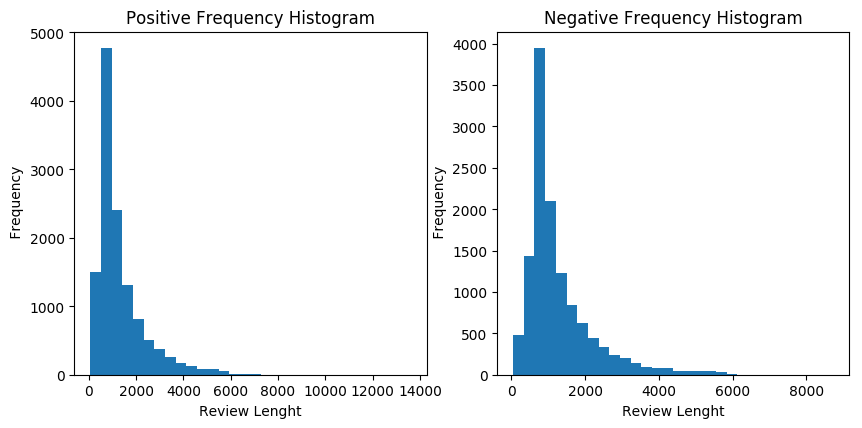

In [8]:
# viualization of the review length frequncy

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})

plt.subplot(2, 2, 1)
x = mylen(cleantrain[:12500])
plt.hist(x, bins=30)
plt.gca().set(title='Positive Frequency Histogram',xlabel='Review Lenght', ylabel=' Frequency');

plt.subplot(2, 2, 2)
x = mylen(cleantrain[12500:])
plt.hist(x, bins=30)
plt.gca().set(title='Negative Frequency Histogram',xlabel='Review Lenght', ylabel=' Frequency');

plt.show()


In [0]:
labels=[1 if i <12500 else 0 for i in range(25000)]



In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vec=CountVectorizer(binary=True)
vec.fit(cleantrain)
X = vec.transform(cleantrain)
X_test = vec.transform(cleantest)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



X_train, X_val, y_train, y_val = train_test_split(X, labels, test_size=0.30, random_state=42)


bench=LogisticRegression()
bench.fit(X_train, y_train)

print ("Accuracy: %s" % accuracy_score(y_val,bench.predict(X_val)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.8717333333333334


In [12]:
final=LogisticRegression()
final.fit(X,labels)

print ("Accuracy: %s" % accuracy_score(labels,bench.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.86728


In [0]:
p=bench.predict(X_test)

In [0]:
pp=[1 if labels[i]==p[i] else 0 for i in range(25000)]

In [0]:
with open('listfile.txt', 'w') as filehandle:
    for listitem in pp:
        filehandle.write('%s\n' % listitem)